## Task 4
Fit a multiple linear regression model:
$$
\begin{equation*}
Price=\beta_0 + \beta_1\times Size +\beta_2\times Bedrooms +\beta_3\times Distance
\end{equation*}
$$

Data loading and importing libraries

In [99]:
import numpy as np
import pandas as pd

data = pd.read_csv('task4_data.csv').to_numpy()
X = data[:, :-1]
X_true = X.copy()
# normalize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
y = data[:, -1]
# Augment X with a column of ones
X = np.hstack([np.ones((X.shape[0], 1)), X])

**(i)** Define model parameter vector $w=[\beta_0,\beta_1,...,\beta_3]^\top$.

In [100]:
l = 0.01
w = np.linalg.inv(X.T @ X + l*np.eye(X.shape[1])) @ X.T @ y
# de-normalize the weights
w[1:] /= X_true.std(axis=0)
w[0] -= (w[1:] @ X_true.mean(axis=0))
print("Model parameters:", w)

Model parameters: [48.26405828  0.15118266 -0.38743107 -1.94893284]


**(iii)** Predict the house price for 2000 sq ft, 4 bedrooms, 5 km from the city

In [101]:
x_new = np.array([1, 2000, 4, 5])
predicted_price = x_new @ w
print("Price: $", int(predicted_price)*1000)

Price: $ 339000


## Task 5

Data loading and importing libraries

In [117]:
import numpy as np
import pandas as pd

data = pd.read_csv('task5_data.csv').to_numpy()
X = data[:, :-1]
# Augment X with a column of ones
X_tilde = np.hstack([np.ones((X.shape[0], 1)), X])
# Add factor "spend^2"
X_tilde = np.hstack([X_tilde, X_tilde[:, 1:2]**2])


(i) Fit the model

In [118]:
# Fit the model
l = .1
w = np.linalg.inv(X_tilde.T @ X_tilde + l*np.eye(X_tilde.shape[1])) @ X_tilde.T @ y
print("Model parameters:", w)

Model parameters: [ 5.71350175 -3.42137849  1.17646243]


(ii) Fit linear regression model for comparison

In [ ]:
X_hat = np.hstack([np.ones((X.shape[0], 1)), X])
l = .1
w_linear = np.linalg.inv(X_hat.T @ X_hat + l*np.eye(X_hat.shape[1])) @ X_hat.T @ y
print("Linear model parameters:", w_linear)

Linear model parameters: [-16.05246253   8.88008565]


(iii) Visualisations

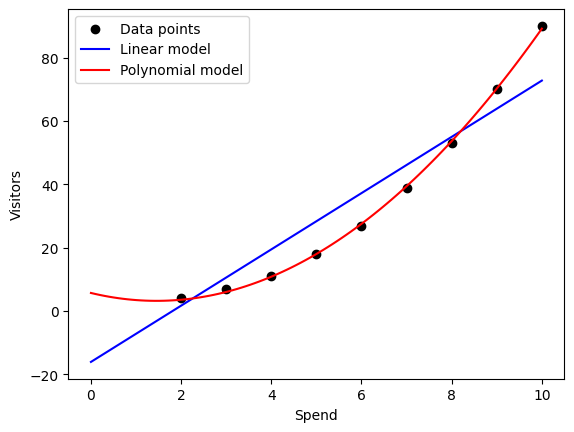

In [119]:
import matplotlib.pyplot as plt

# Plotting the data points
plt.scatter(X[:, 0], y, color='black', label='Data points')
# Plotting the linear regression model
x_values = np.linspace(0, 10, 100)
y_values = w_linear[0] + w_linear[1] * x_values
plt.plot(x_values, y_values, color='blue', label='Linear model')
# Plotting the quadratic regression model
x_values = np.linspace(0, 10, 100)
y_values = w[0] + w[1] * x_values + w[2] * x_values**2
plt.plot(x_values, y_values, color='red', label='Polynomial model')
plt.xlabel('Spend')
plt.ylabel('Visitors')
plt.legend()
plt.show()

In [120]:
def predict(spend):
    return w[0] + w[1] * spend + w[2] * spend**2

print("Predicted visitors:", int(predict(12)))

Predicted visitors: 134


## Task 6

**(i)** Fit linear regression model with p=1 and p=2.


Importing libraries and loading data

In [32]:
import numpy as np
import pandas as pd

data = pd.read_csv('task6_data.csv').to_numpy()
X = data[:, :-1]
y = data[:, -1]

# Normalize the data
X_true = X.copy()
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Augment X with a column of ones
X_tilde = np.hstack([np.ones((X.shape[0], 1)), X])

Defining loss functions and gradient function for L1 norm loss

In [ ]:
def L1_loss(X, y, w, l=0.1):
    return 1/len(y) * np.sum((X @ w - y)**2) + l * np.sum(np.abs(w))**2

def L2_loss(X, y, w, l=0.1):
    return 1/len(y) * np.sum((X @ w - y)**2) + l * np.sum(w**2)

def L1_gradient(X, y, w, l=0.1):
    mse_grad = -2/len(y) * X.T @ (y - X @ w)
    l1_term = 2 * l * np.sum(np.abs(w)) * (w/np.sum(np.abs(w)))  # Correct scaling
    return mse_grad + l1_term

Fitting the model with p=1 (L1 norm). Gradient descent is used to train the weights.

In [ ]:
# Regularization coefficient
l = 0.1

w_l1 = np.ones(X_tilde.shape[1]) # Initialize the weights
n_iter = 10000
rho = 0.01 
for i in range(n_iter):
    grad = L1_gradient(X_tilde, y, w_l1, l)
    w_l1 -= rho * grad

# Convert the weigths back to the original scale
w_l1[1:] /= X_true.std(axis=0)
w_l1[0] -= (w_l1[1:] @ X_true.mean(axis=0))

print("Model weights with p=1:", w_l1, "\nLoss:", L1_loss(X_tilde, y, w_l1, l))

Model weights with p=1: [14.49784732  6.70572956  0.12292363 -0.7085955   0.34060072] 
Loss: 13424.535456918555


Fitting the model with p=2 (L2 norm).

In [ ]:
# Regularization coefficient
l = 0.1

w_l2 = np.linalg.inv(X_tilde.T @ X_tilde + l * np.eye(X_tilde.shape[1])) @ X_tilde.T @ y

# Convert the weigths back to the original scale

w_l2[1:] /= X_true.std(axis=0)
w_l2[0] -= (w_l2[1:] @ X_true.mean(axis=0))

print("Model weights with p=2:", w_l2, "\nLoss:", L2_loss(X_tilde, y, w_l2, l))

Model weights with p=2: [-1.38642900e-03  1.62100559e-04  2.32206037e-06 -2.02035971e-05
  1.00612969e-05] 
Loss: 17206.46499507325


**(ii)** Tuning $\lambda$ with cross-validation. Using N-1 fold cross-validation.

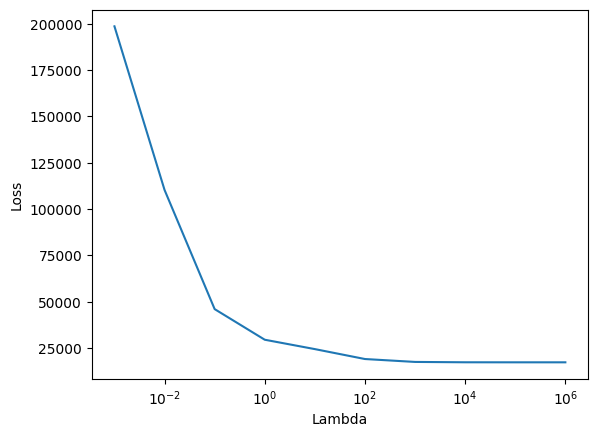

In [ ]:
lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000,1000000]
losses = []
for l in lambdas:
    total_loss = 0
    for i in range(len(y)):
        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i, axis=0)
        w = np.linalg.inv(X_train.T @ X_train + l * np.eye(X_train.shape[1])) @ X_train.T @ y_train
        total_loss += (X[i,:] @ w - y[i])**2 + l * np.sum(w**2)
    losses.append(total_loss/len(y))
    

plt.plot(lambdas, losses)
plt.xlabel('Lambda')
plt.ylabel('Loss')
plt.xscale('log')
plt.show()

## Task 3

Model parameters: [-13.91109456   0.3076154    0.13322711]


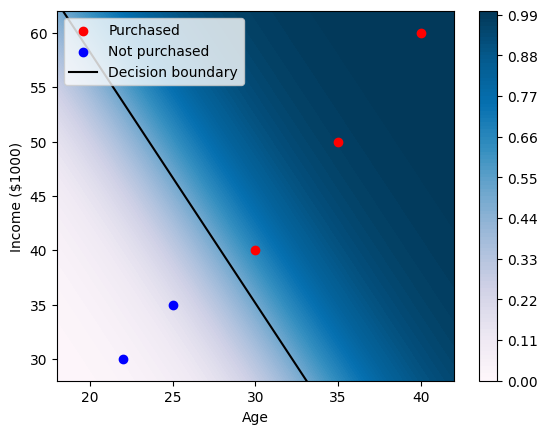

In [8]:
import numpy as np
import pandas as pd

data = pd.read_csv('task3_data.csv', header=None).to_numpy()
X_true = data[:, :-1]
# normalize
X = (X_true - X_true.mean(axis=0)) / X_true.std(axis=0)
# Augment X with a column of ones
X = np.hstack([np.ones((X.shape[0], 1)), X])
y = data[:, -1]
y[y==0] = -1

def L2_loss(X, y, w, l=0.1):
    return np.mean(np.log(1+np.exp(-y*(X @ w.T)))) + l * np.sum(w**2)

lr = 0.005
l = 0.01
w = np.zeros(X.shape[1])

def gradient(X, y, w, l=0.1):
    total = 2*l*w
    for i in range(len(y)):
        total += (-y[i]*X[i]*np.exp(-y[i]*X[i]@w))/(1+np.exp(-y[i]*X[i] @ w))

    return total

losses = []
best_loss = float('inf')
best_w = None
for i in range(1000):
    w -= lr*gradient(X, y, w, l)
    loss = L2_loss(X, y, w, l)
    if loss < best_loss:
        best_loss = loss
        best_w = w.copy()

w = best_w

# Convert model weights to the original scale
w[1:] /= X_true.std(axis=0)
w[0] -= (w[1:] @ X_true.mean(axis=0))


print("Model parameters:", w)

import matplotlib.pyplot as plt

# Probability heatmap
x_values = np.linspace(18, 42, 100)
y_values = np.linspace(28, 62, 100)
X_values, Y_values = np.meshgrid(x_values, y_values)
Z = np.zeros(X_values.shape)
for i in range(X_values.shape[0]):
    for j in range(X_values.shape[1]):
        Z[i, j] = 1 / (1 + np.exp(-w @ np.array([1, X_values[i, j], Y_values[i, j]])))
plt.contourf(X_values, Y_values, Z, levels=100, cmap='PuBu')
plt.colorbar()
# Plotting the data points
plt.scatter(X_true[y==1, 0], X_true[y==1, 1], color='red', label='Purchased')
plt.scatter(X_true[y==-1, 0], X_true[y==-1, 1], color='blue', label='Not purchased')
# Plotting the decision boundary
x_values = np.linspace(18, 42, 100)
y_values = (-w[0] - w[1] * x_values) / w[2]
plt.plot(x_values, y_values, color='black', label='Decision boundary')
plt.xlabel('Age')
plt.ylabel('Income ($1000)')
plt.legend(loc='upper left')
# axis
plt.xlim([18, 42])
plt.ylim([28, 62])
plt.show()
